In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models


2023-12-27 11:00:23.116837: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 11:00:23.331789: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 11:00:23.331831: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 11:00:23.350081: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 11:00:23.402571: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 11:00:23.403480: I tensorflow/core/platform/cpu_feature_guard.cc:1

### Load and Inspect the Data

In [3]:
df_train = pd.read_csv('arrhythmia_train.csv')
df_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X179,X180,X181,X182,X183,X184,X185,X186,X187,arrhythmia
0,0.562814,0.974874,0.994975,0.246231,0.065327,0.321608,0.376884,0.442211,0.422111,0.467337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.744000,0.216000,0.064000,0.264000,0.360000,0.432000,0.436000,0.412000,0.412000,0.440000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.859438,0.775100,0.257028,0.060241,0.084337,0.060241,0.036145,0.016064,0.008032,0.028112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.807531,0.430962,0.041841,0.016736,0.146444,0.209205,0.221757,0.251046,0.276151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.000000,0.894140,0.463138,0.013233,0.054820,0.247637,0.285444,0.270321,0.274102,0.270321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
df_test = pd.read_csv('arrhythmia_test.csv')
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X179,X180,X181,X182,X183,X184,X185,X186,X187,arrhythmia
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
df_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X179,X180,X181,X182,X183,X184,X185,X186,X187,arrhythmia
count,112210.000000,112210.000000,112210.000000,112210.000000,112210.000000,112210.000000,112210.000000,112210.000000,112210.000000,112210.000000,...,112210.000000,112210.000000,112210.000000,112210.000000,112210.000000,112210.000000,112210.00000,112210.000000,112210.000000,112210.000000
mean,0.817224,0.697935,0.477430,0.335048,0.306901,0.297016,0.280992,0.264649,0.245529,0.223596,...,0.011605,0.010967,0.010427,0.009668,0.009151,0.008777,0.00841,0.007898,0.007597,1.761118
std,0.299179,0.273393,0.252109,0.261437,0.237669,0.221046,0.216267,0.202262,0.182549,0.172322,...,0.067281,0.065860,0.064253,0.061683,0.060086,0.058923,0.05723,0.054884,0.053429,1.616835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.781320,0.547684,0.282243,0.105850,0.112957,0.116105,0.094631,0.088057,0.090051,0.090426,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.956725,0.790278,0.488226,0.294118,0.237596,0.235461,0.236938,0.233527,0.222642,0.183607,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
75%,1.000000,0.909091,0.658153,0.521552,0.489164,0.468510,0.439220,0.407547,0.355372,0.303571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000


In [5]:
df_test.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X179,X180,X181,X182,X183,X184,X185,X186,X187,arrhythmia
count,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,...,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000,21729.000000
mean,0.894204,0.761008,0.425019,0.220546,0.201729,0.210224,0.205228,0.201560,0.198266,0.196696,...,0.004622,0.004360,0.004050,0.003817,0.003666,0.003485,0.003190,0.003023,0.002968,0.454876
std,0.234998,0.218893,0.227884,0.208345,0.177848,0.172504,0.178360,0.176514,0.170541,0.166973,...,0.043288,0.042344,0.040404,0.039543,0.038678,0.037857,0.036036,0.035654,0.035397,1.126646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924444,0.681818,0.249615,0.049844,0.082569,0.087719,0.072289,0.065817,0.064426,0.068571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990196,0.828343,0.431250,0.165789,0.147541,0.158442,0.144330,0.145320,0.151515,0.150259,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.911839,0.582301,0.345821,0.259804,0.288079,0.299035,0.295327,0.290576,0.283582,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.996198,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


In [7]:
df_train.isnull().sum()

X1            0
X2            0
X3            0
X4            0
X5            0
             ..
X184          0
X185          0
X186          0
X187          0
arrhythmia    0
Length: 188, dtype: int64

In [8]:
df_test.isnull().sum()

X1            0
X2            0
X3            0
X4            0
X5            0
             ..
X184          0
X185          0
X186          0
X187          0
arrhythmia    0
Length: 188, dtype: int64

In [9]:
df_train.shape

(112210, 188)

In [10]:
df_test.shape

(21729, 188)

[Text(0, 0, 'Normal beat (class 0)'),
 Text(1, 0, 'Supraventricular ectopic beat (class 1)'),
 Text(2, 0, 'Ventricular ectopic beat (class 2)'),
 Text(3, 0, 'Unknown beats (class 4)')]

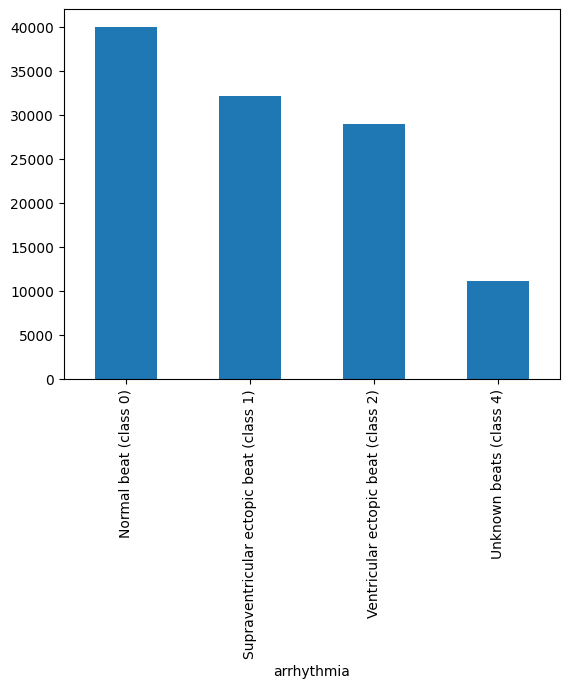

In [6]:
ax = df_train['arrhythmia'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Normal beat (class 0)', 'Supraventricular ectopic beat (class 1)', 'Ventricular ectopic beat (class 2)', 'Unknown beats (class 4)'])






In [7]:
import pandas as pd
# Read the dataset
df = pd.read_csv('arrhythmia_train.csv')

# Get the number of records and attributes
num_records, num_attributes = df.shape
print(f"The dataset contains {num_records} records, each with {num_attributes} attributes.")

# Get the format of the ECG signals
ecg_format = df.columns[1:]
print(f"The ECG signals are in a 1D time series format with {len(ecg_format)} data points.")

# Get the class labels
class_labels = df.nunique()
print(f"The class labels are: {class_labels}")
# The dataset contains 87553 records, each with 278 attributes. The first attribute is the class label, and the rest are ECG signal data.
# The ECG signal data is a 1D time series measured at 300Hz, with 187 data points. The class label is an integer between 0 and 15, corresponding to the following 16 classes:


The dataset contains 112210 records, each with 188 attributes.
The ECG signals are in a 1D time series format with 187 data points.
The class labels are: X1            25821
X2            43430
X3            48416
X4            42686
X5            42287
              ...  
X184           1249
X185           1165
X186           1098
X187           1068
arrhythmia        4
Length: 188, dtype: int64


In [8]:
df_train.value_counts()

X1        X2        X3        X4        X5        X6        X7        X8        X9        X10       X11       X12       X13       X14       X15       X16       X17       X18       X19       X20       X21       X22       X23       X24       X25       X26       X27       X28       X29       X30       X31       X32       X33       X34       X35       X36       X37       X38       X39       X40       X41       X42       X43       X44       X45       X46       X47       X48       X49       X50       X51       X52       X53       X54       X55       X56       X57       X58       X59       X60       X61       X62       X63       X64       X65       X66       X67       X68       X69       X70       X71       X72       X73       X74       X75       X76       X77       X78       X79       X80       X81       X82       X83       X84       X85       X86       X87       X88       X89       X90       X91       X92       X93       X94       X95       X96       X97       X98       X99       X100      

In [9]:
df_test.value_counts()

X1        X2        X3        X4        X5        X6        X7        X8        X9        X10       X11       X12       X13       X14       X15       X16       X17       X18       X19       X20       X21       X22       X23       X24       X25       X26       X27       X28       X29       X30       X31       X32       X33       X34       X35       X36       X37       X38       X39       X40       X41       X42       X43       X44       X45       X46       X47       X48       X49       X50       X51       X52       X53       X54       X55       X56       X57       X58       X59       X60       X61       X62       X63       X64       X65       X66       X67       X68       X69       X70       X71       X72       X73       X74       X75       X76       X77       X78       X79       X80       X81       X82       X83       X84       X85       X86       X87       X88       X89       X90       X91       X92       X93       X94       X95       X96       X97       X98       X99       X100      

In [10]:
# Inspecting the ECG Signal Format in the Training Set
df_train.iloc[:,:-1].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187
0,0.562814,0.974874,0.994975,0.246231,0.065327,0.321608,0.376884,0.442211,0.422111,0.467337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.744000,0.216000,0.064000,0.264000,0.360000,0.432000,0.436000,0.412000,0.412000,0.440000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.859438,0.775100,0.257028,0.060241,0.084337,0.060241,0.036145,0.016064,0.008032,0.028112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.807531,0.430962,0.041841,0.016736,0.146444,0.209205,0.221757,0.251046,0.276151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.894140,0.463138,0.013233,0.054820,0.247637,0.285444,0.270321,0.274102,0.270321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Inspecting the ECG Signal Format in the Test Set
df_test.iloc[:,:-1].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
nprmal_beats = df_train[df_train['arrhythmia'] == 0]
nprmal_beats.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X179,X180,X181,X182,X183,X184,X185,X186,X187,arrhythmia
0,0.562814,0.974874,0.994975,0.246231,0.065327,0.321608,0.376884,0.442211,0.422111,0.467337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.744000,0.216000,0.064000,0.264000,0.360000,0.432000,0.436000,0.412000,0.412000,0.440000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.859438,0.775100,0.257028,0.060241,0.084337,0.060241,0.036145,0.016064,0.008032,0.028112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.807531,0.430962,0.041841,0.016736,0.146444,0.209205,0.221757,0.251046,0.276151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.000000,0.894140,0.463138,0.013233,0.054820,0.247637,0.285444,0.270321,0.274102,0.270321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


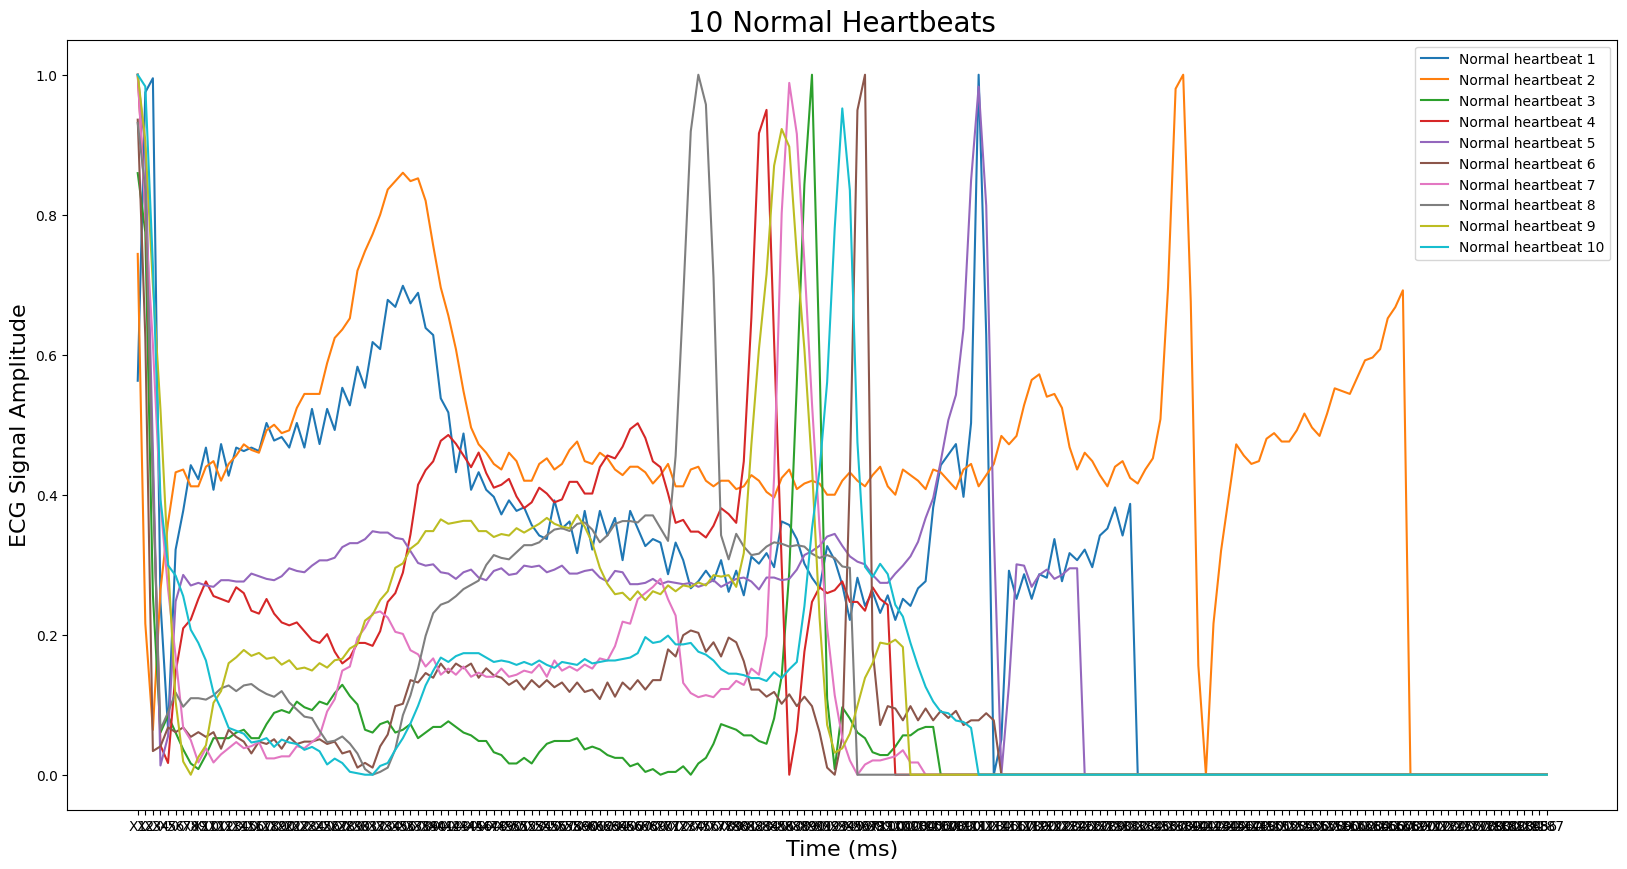

In [13]:
plt.figure(figsize=(20, 10))

# plot 10 normal heartbeats

for i in range(10):
    heartbeat =nprmal_beats.iloc[i,:-1]
    plt.plot(heartbeat, label=f'Normal heartbeat {i+1}')

plt.title("10 Normal Heartbeats", fontsize=20)
plt.xlabel("Time (ms)", fontsize=16)
plt.ylabel("ECG Signal Amplitude", fontsize=16)
plt.legend()
plt.show()


In [34]:
feature_1 = df_train[df_train['arrhythmia'] == 1].iloc[0, 1:-1]
print(f"Supraventricular: {feature_1}")
feature_2 = df_train[df_train['arrhythmia'] == 2].iloc[0, 1:-1]
print(f"Ventricular: {feature_2}")

Supraventricular: X2      0.666667
X3      0.100457
X4      0.036530
X5      0.073059
X6      0.050228
          ...   
X183    0.000000
X184    0.000000
X185    0.000000
X186    0.000000
X187    0.000000
Name: 40000, Length: 186, dtype: float64
Ventricular: X2      0.009756
X3      0.074390
X4      0.162195
X5      0.240244
X6      0.291463
          ...   
X183    0.000000
X184    0.000000
X185    0.000000
X186    0.000000
X187    0.000000
Name: 42223, Length: 186, dtype: float64


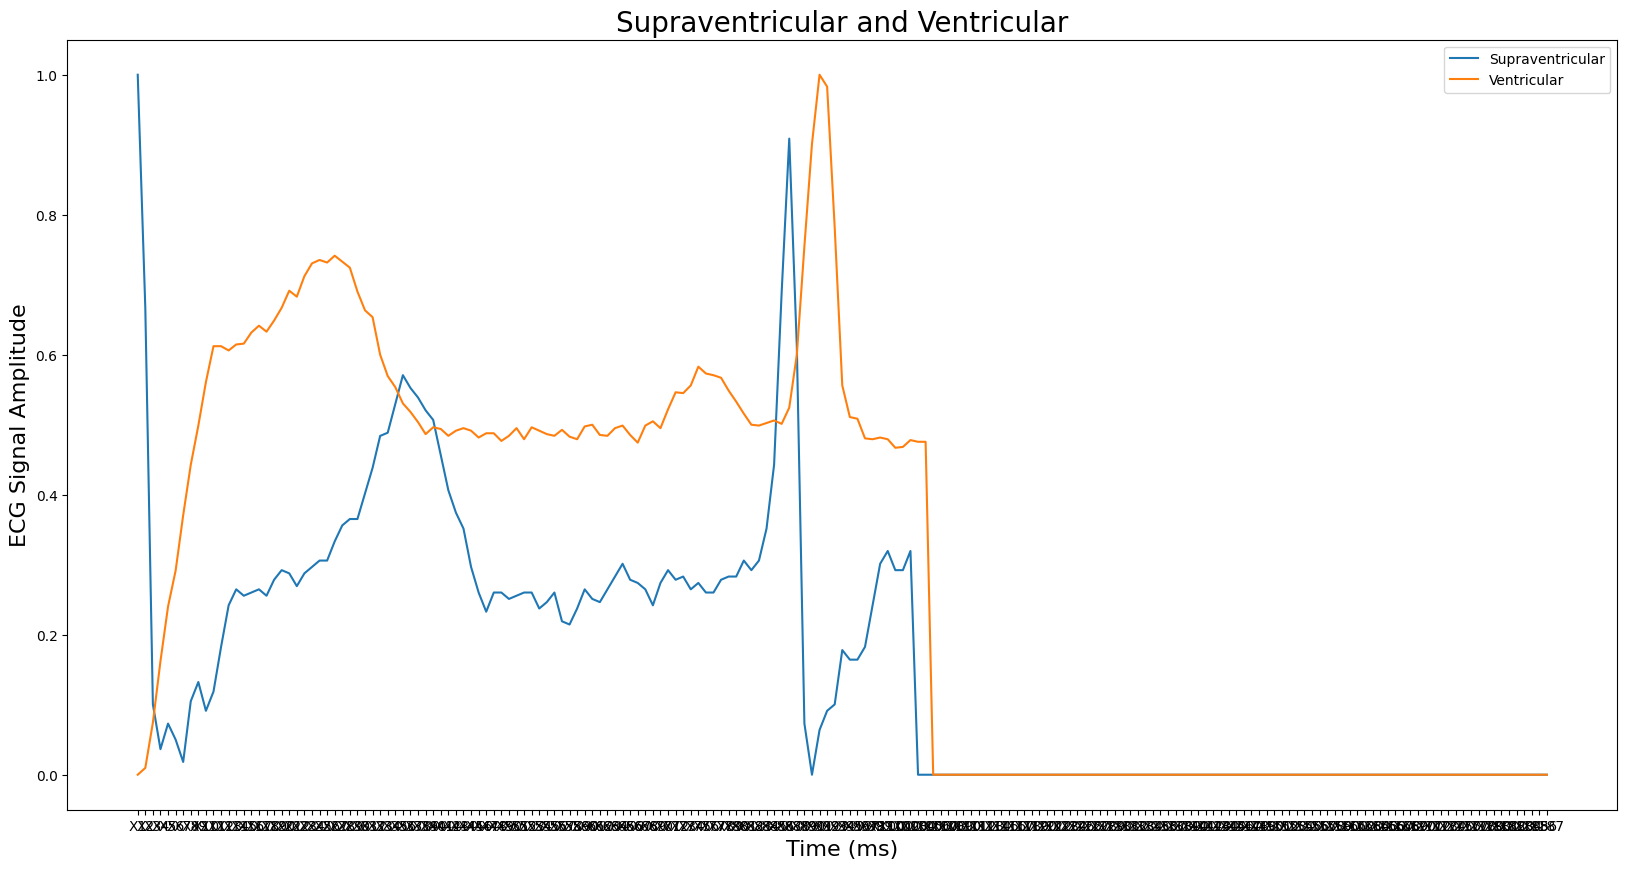

In [33]:
plt.figure(figsize=(20, 10))

# Plot feature_1
plt.plot(feature_1, label='Supraventricular')

# Plot feature_2
plt.plot(feature_2, label='Ventricular')

# Set title and labels
plt.title('Supraventricular and Ventricular', fontsize=20)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('ECG Signal Amplitude', fontsize=16)

# Display legend
plt.legend()

# Show the plot
plt.show()